# Exponential Distribution Analysis

Placeholder notebook for generating and analyzing exponential distribution data as part of the project results.

In [1]:
import http.server, socketserver, threading, numpy as np, matplotlib.pyplot as plt, time
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from scipy.stats import binom, norm

PORT = 8000

def start_server():
    Handler = http.server.SimpleHTTPRequestHandler
    httpd = socketserver.TCPServer(("", PORT), Handler)
    print(f"Serving at http://localhost:{PORT}")
    httpd.serve_forever()

thread = threading.Thread(target=start_server)
thread.daemon = True
thread.start()

# Styling for plots
plt.style.use('seaborn-v0_8')  # Use Seaborn style

Serving at http://localhost:8000


In [20]:
def p(l,j,lam):
    s = np.exp(lam)
    return 1 - (s**(j+1) - 1)/(s**(l+2) - 1)

def theta(l,j,lam):
    return 2*np.arcsin((p(l,j,lam))**(1/2))



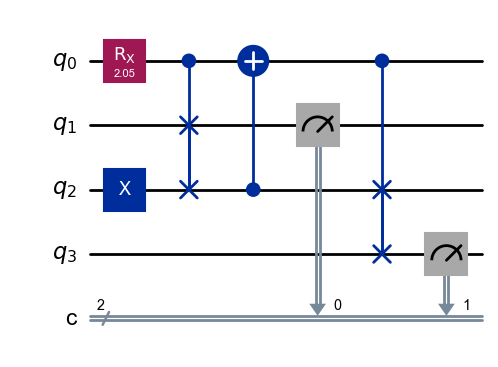

In [26]:
layers = 1
bins = layers + 1

# quantum circuit set up
n_qubits = (2*layers + 1) + 1
n_bits = bins

exp_circuit = QuantumCircuit(n_qubits,n_bits)

# define useful concepts
ancilla = 0
ball = bins
lam = 1
state_0 = [1,0]

# layer 0 peg 0
exp_circuit.rx(theta(0,0,lam),ancilla)
exp_circuit.x(ball)
exp_circuit.cswap(ancilla,ball - 1, ball)
exp_circuit.cx(ball,ancilla)
exp_circuit.cswap(ancilla,ball,ball + 1)

for i in range(bins):
    exp_circuit.measure((2*i + 1), i)

exp_circuit.draw(output='mpl')

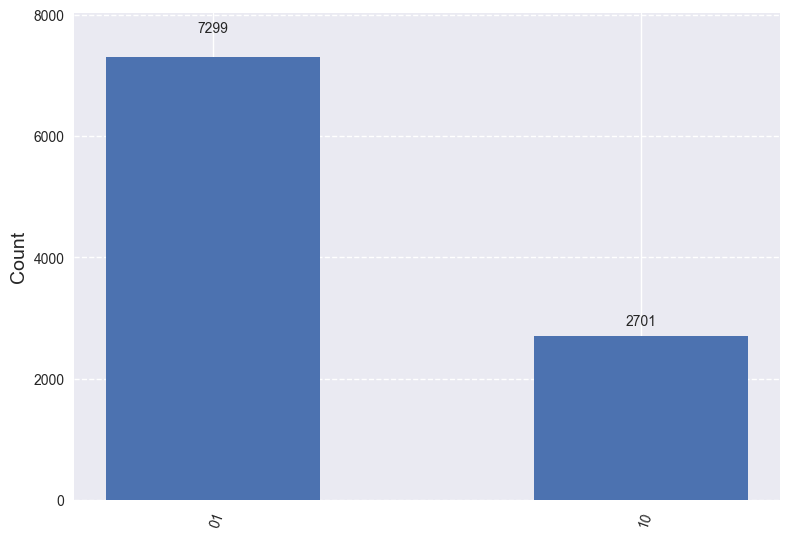

In [27]:
aer_sim = AerSimulator().run(exp_circuit,shots=10000)
answer = aer_sim.result().get_counts(exp_circuit)
plot_histogram(answer)

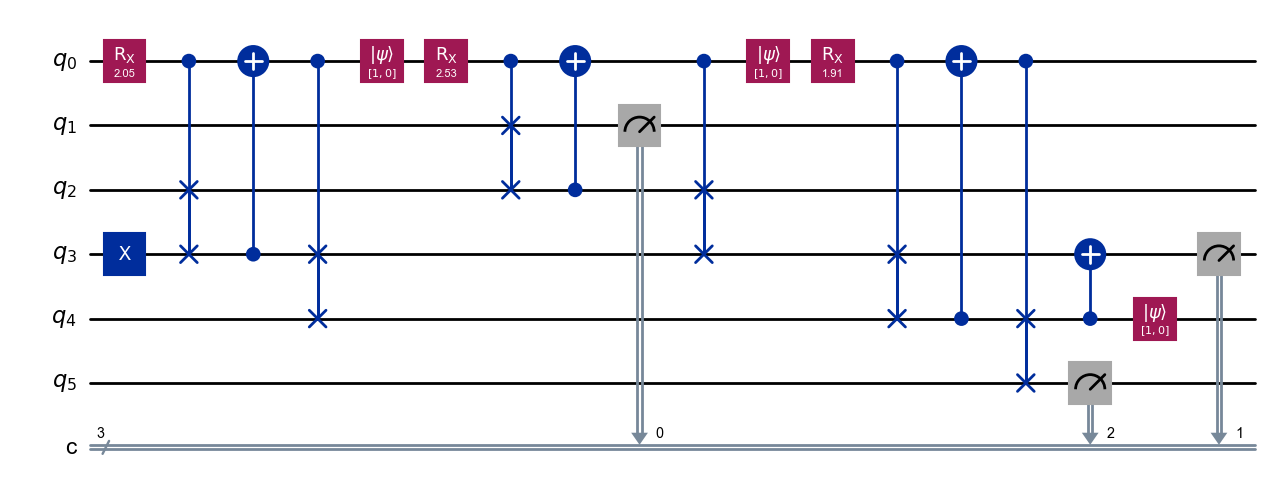

In [30]:
layers = 2
bins = layers + 1

# quantum circuit set up
n_qubits = (2*layers + 1) + 1
n_bits = bins

exp_circuit = QuantumCircuit(n_qubits,n_bits)

# define useful concepts
ancilla = 0
ball = bins
lam = 1
state_0 = [1,0]

# layer 0 peg 0
exp_circuit.rx(theta(0,0,lam),ancilla)
exp_circuit.x(ball)
exp_circuit.cswap(ancilla,ball - 1, ball)
exp_circuit.cx(ball,ancilla)
exp_circuit.cswap(ancilla,ball,ball + 1)

# layer 1 peg 0
exp_circuit.initialize(state_0,ancilla)
exp_circuit.rx(theta(1,0,lam),ancilla)
exp_circuit.cswap(ancilla,ball - 2, ball - 1)
exp_circuit.cx(ball - 1,ancilla)
exp_circuit.cswap(ancilla,ball - 1,ball)

# layer 1 peg 1
exp_circuit.initialize(state_0,ancilla)
exp_circuit.rx(theta(1,1,lam),ancilla)
exp_circuit.cswap(ancilla,ball, ball + 1)
exp_circuit.cx(ball + 1,ancilla)
exp_circuit.cswap(ancilla,ball + 1,ball + 2)

exp_circuit.cx(ball + 1, ball)
exp_circuit.initialize(state_0,ball + 1)

for i in range(bins):
    exp_circuit.measure((2*i + 1), i)

exp_circuit.draw(output='mpl')


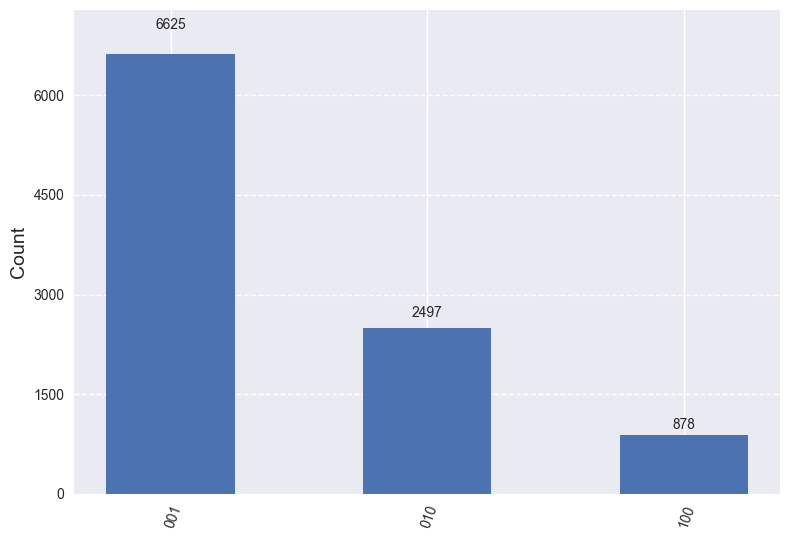

In [31]:
aer_sim = AerSimulator().run(exp_circuit,shots=10000)
answer = aer_sim.result().get_counts(exp_circuit)
plot_histogram(answer)

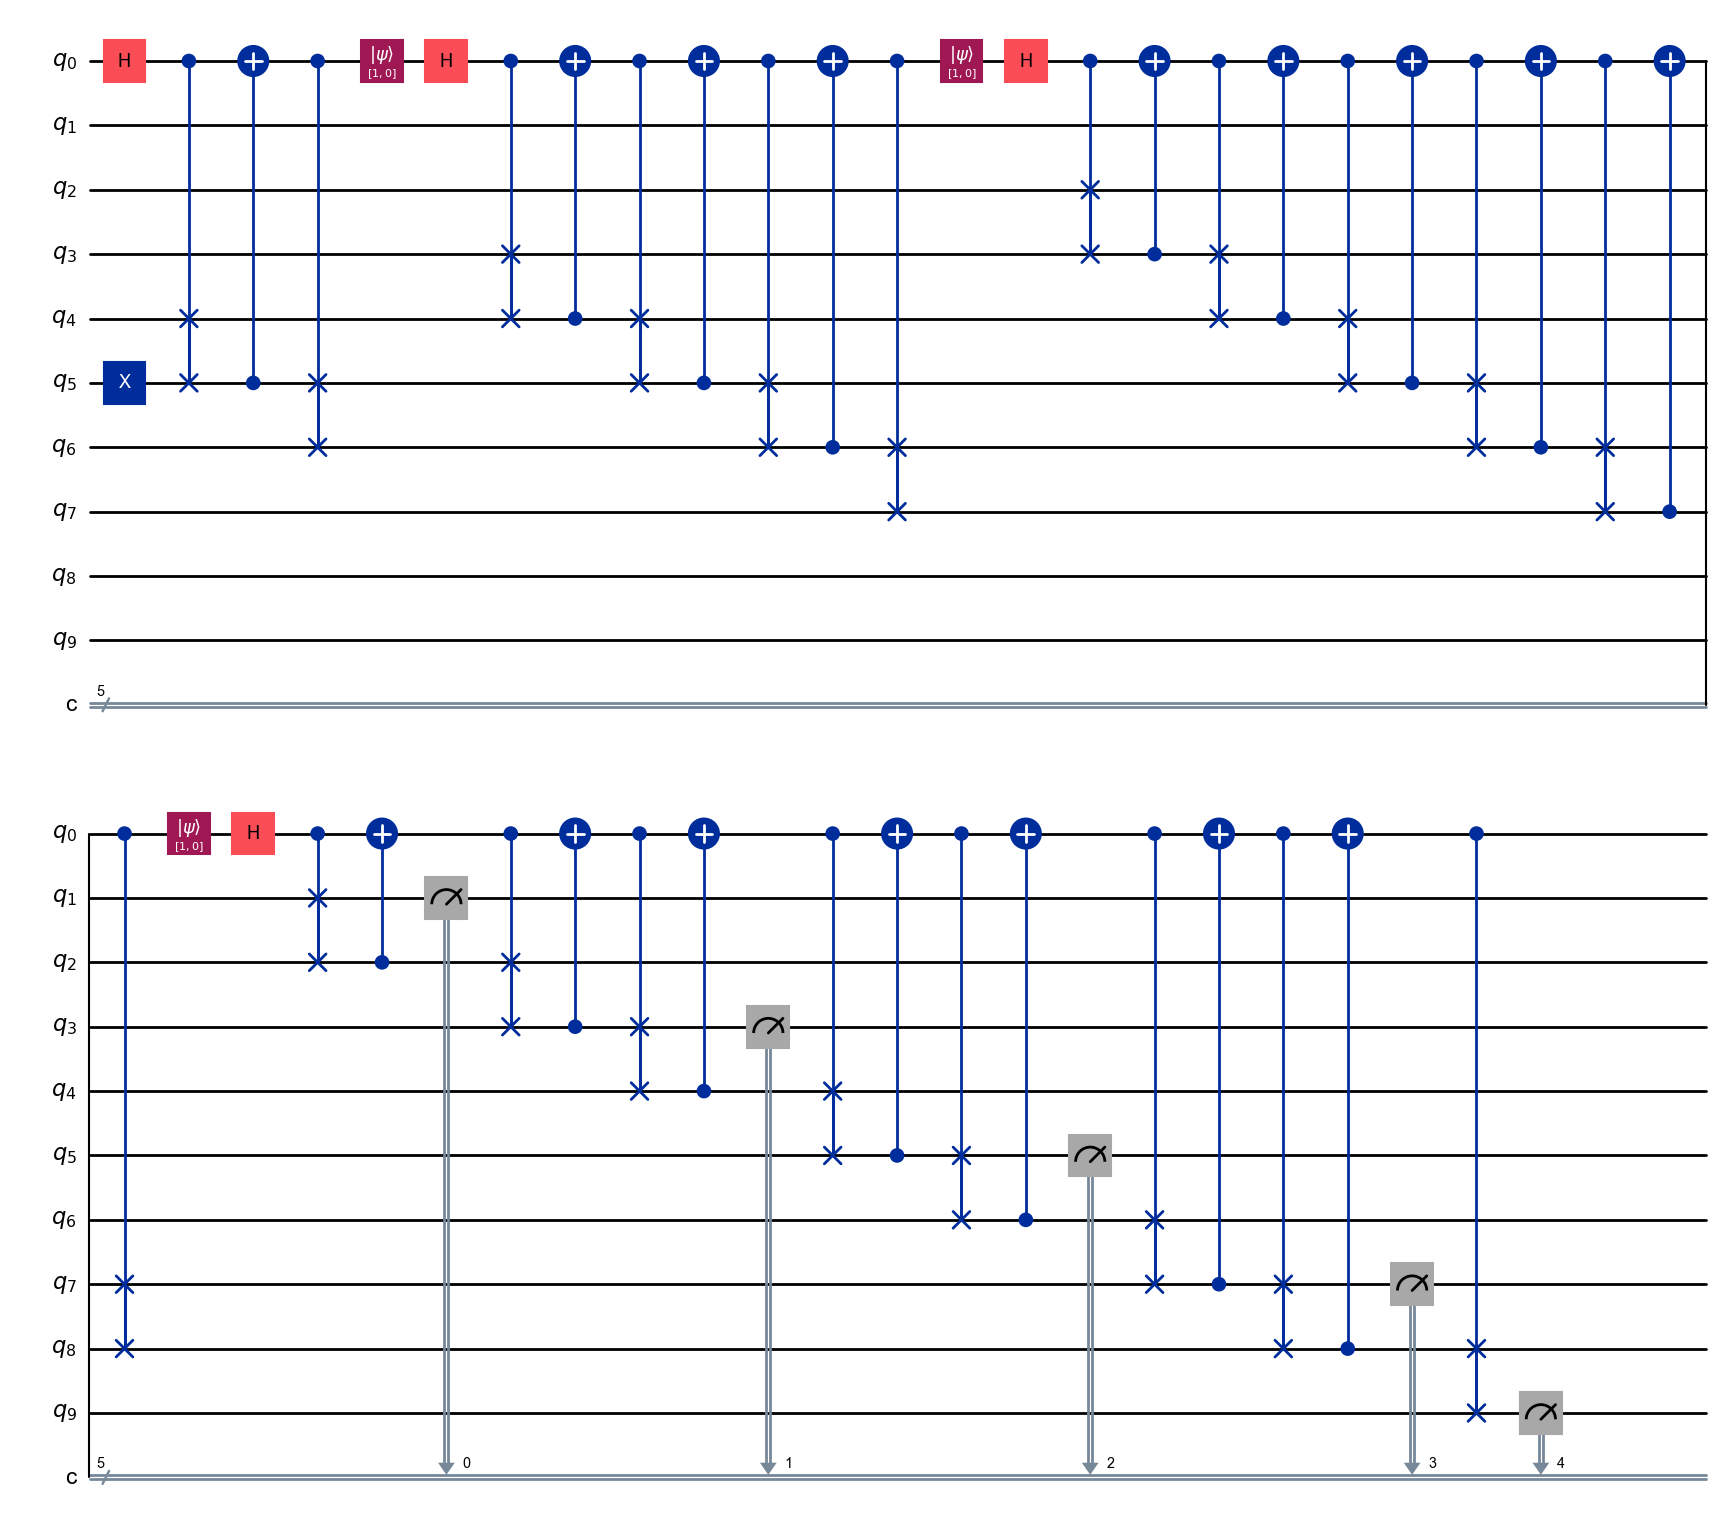

In [ ]:
# test for n layers 
# classical information 
layers = 4
bins = layers + 1

# quantum circuit set up
n_qubits = (2*layers + 1) + 1
n_bits = bins

peg_circuit = QuantumCircuit(n_qubits,n_bits)

# define useful concepts
ancilla = 0
ball = bins

state_0 = [1,0]

def pegs_exp(layer, qc):

    if(layer != 1):
        qc.initialize(state_0,ancilla)
        qc.h(ancilla)
    else:
        qc.h(ancilla)
        qc.x(ball)
    
    for j in range(0, (2*layer - 1)):
        base = ball - layer + j
        qc.cswap(ancilla, base, base + 1)
        qc.cx(base + 1, ancilla)
    
    base = ball + layer
    peg_circuit.cswap(ancilla, base - 1, base)


i = 1

while (i <= layers):
    pegs_exp(i, peg_circuit)
    i = i + 1


for i in range(bins):
    peg_circuit.measure((2*i + 1), i)

peg_circuit.draw(output='mpl')